In [1]:
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from scipy.optimize import curve_fit
from scipy.stats import chi2

In [11]:
energy, intensity = np.genfromtxt('spectrum.lvm', delimiter="\t", unpack=True, skip_header=0)

Text(0, 0.5, 'Intensity(nW)')

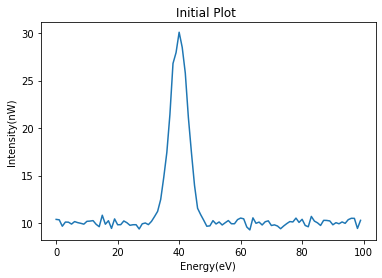

In [52]:
plt.plot(energy, intensity)
plt.title("Initial Plot ")
plt.xlabel("Energy(eV)")
plt.ylabel("Intensity(nW)")


In [96]:
#taking error for points away from the peak
err2 = np.std(intensity[0:30])
print(err2)

#assign error to all values in intensity array
err = intensity*err2
#print(err)

0.2969316913496436


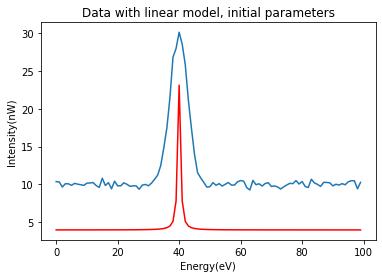

In [97]:
# Define model function
def model(x, a, b,t,x0):
    return a + (b/3.14)*((t/2)/((x-x0)**2 + (t/2)**2))

# Set initial parameters m0 and b0
aInit = 4
bInit = 30
tInit = 1
x0Init = 40



# Make the plot
# Recall the order of the arguments in the model definition, model(x, m, b):
plt.plot(energy, model(energy, aInit, bInit, tInit,x0Init), 'r-')
plt.plot(energy, intensity)
#plt.errorbar(energy, intensity, yerr=err, fmt='o')
plt.xlabel("Energy(eV)")
plt.ylabel("Intensity(nW)")
plt.title('Data with linear model, initial parameters')
plt.show()

In [108]:
# Fit the model to the data and display results
# The order of the parameter array elements p0, pOpt, and pCov
# are determined by their order [m,b] in the model definition, model(x,m,b):
pOpt, pCov = curve_fit(model, energy, intensity, p0=[aInit, bInit, tInit, x0Init], sigma=err, absolute_sigma=True)
#print("[aOpt bOpt tOpt x0Init] =", pOpt)
#print()
#print("pCov =")
#print(pCov)

In [99]:
# Assign results of curve_fit to new variables
aOpt = pOpt[0]
bOpt = pOpt[1]
tOpt = pOpt[2]
x0Opt = pOpt[3]
aAlpha = np.sqrt(pCov[0, 0])
bAlpha = np.sqrt(pCov[1, 1])
tAlpha = np.sqrt(pCov[2,2])
x0Alpha = np.sqrt(pCov[3,3])
rho_mb = pCov[0, 1]/(aAlpha*bAlpha*tAlpha*x0Alpha)

In [100]:
print("A = {0:.8f} ± {1:.10f}".format((aOpt), aAlpha))
print("B = {0:.9f} ± {1:.10f}".format(bOpt, bAlpha))
print("T = {0:.9f} ± {1:.10f}".format(tOpt, tAlpha))
print("x0 = {0:.9f} ± {1:.10f}".format(x0Opt, x0Alpha))


A = 9.69517823 ± 0.3630887636
B = 169.657601358 ± 33.0330251855
T = 4.647579939 ± 1.2893393467
x0 = 39.920054591 ± 0.5250643193


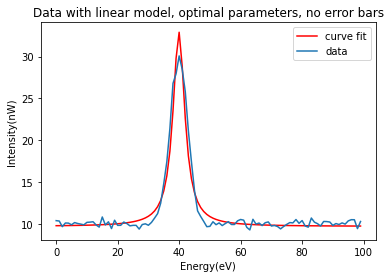

In [101]:
# Plot data with best-fit model
plt.plot(energy, model(energy, aOpt, bOpt, tOpt, x0Opt),'r-', label = "curve fit")
plt.plot(energy, intensity, label = "data")
#plt.errorbar(energy, intensity, yerr=err, fmt='o')
plt.xlabel("Energy(eV)")
plt.ylabel("Intensity(nW)")
plt.title('Data with linear model, optimal parameters, no error bars')
plt.legend()
plt.show()

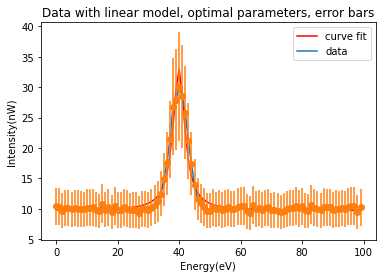

In [102]:
# Plot data with best-fit model
plt.plot(energy, model(energy, aOpt, bOpt, tOpt, x0Opt),'r-', label = "curve fit")
plt.plot(energy, intensity, label = "data")
plt.errorbar(energy, intensity, yerr=err, fmt='o')
plt.xlabel("Energy(eV)")
plt.ylabel("Intensity(nW)")
plt.title('Data with linear model, optimal parameters, error bars')
plt.legend()
plt.show()

In [105]:
# Compute and display chi-squared
res = intensity - model(energy, aOpt, bOpt, tOpt, x0Opt)
normres = res/err
chisq = np.sum(normres**2)
print("chisq = {0:.1f}".format(chisq)) # Adjust the format specification as appropriate

chisq = 4.0


In [106]:
# Compute and display DOF
Ndata = np.size(intensity)
Npar = np.size(pOpt)
dof = Ndata - Npar
print("dof =", dof)

dof = 96


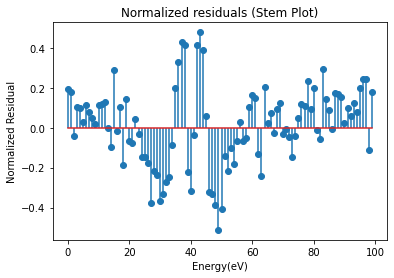

In [107]:
# Show normalized residuals
# Setting use_line_collection=True avoids a warning in Matplotlib 3.1
plt.stem(energy, normres, use_line_collection=True)
plt.ylabel('Normalized Residual')
plt.xlabel("Energy(eV)")
plt.title('Normalized residuals (Stem Plot)')
plt.show()

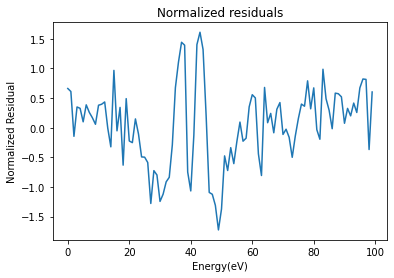

In [90]:
# Show normalized residuals
plt.plot(energy, normres)
plt.ylabel('Normalized Residual')
plt.xlabel("Energy(eV)")
plt.title('Normalized residuals')
plt.show()

In [ ]:
#Comment on Shape of Residual and Chi squared

#Chi squared is reasonable as the model fit well, it was not perfect but within good agreement with the data
#errors were too large
#Residuals depend heavily on error estimation thus we see some fluctuation at peak energy, but far away
#from peak, the residuals are as expected, stem plot shows deviance away from zero line aswell

In [ ]:
#used points away from peak to estimate std and multiplied intensity array by that value to get an array of errors
#errors were too large for the data hence showed plots with and without error to show that curve fit was good